## Sunspot Lab: Sammy Muench, AST 51, 2/1/2023

In [27]:
from tabulate import tabulate as tb
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime

Important data:

Sun equation goes from spot 17 to spot 497

In [121]:
spotA_xcoords = np.array([196, 247, 299, 349])
spotA_xcoords-=17 #normalize
spotA_y = int((sum([320, 321, 322, 324]) / 4)) #calculate average y coordinate of sunspot A
spotA_L = int((sum([462, 460, 461, 461]) / 4)) #calculate average latitude

spotB_xcoords = np.array([113, 158, 207, 259])
spotB_xcoords-=17
spotB_y = int((sum([175, 175, 174, 174]) / 4)) #calculate average y coordinate of sunspot A
spotB_L = int((sum([452, 450, 451, 450]) / 4)) #average latitude for part B


In [118]:
#create array of times

date1 = datetime(2014, 11, 29, 1, 39, 10)
date2 = datetime(2014, 11, 30, 0, 57, 10)
date3 = datetime(2014, 12, 1, 0, 39, 10)
date4 = datetime(2014, 12, 2, 0, 39, 10)

times = np.array([date1, date2, date3, date4])

Sun is a sphere whose diameter spans 480 DS9 coordinates, thus its radius = 240  
$x^2 + y^2 = r^2 = 240^2$  
$y = \sqrt{240^2 - x^2}$

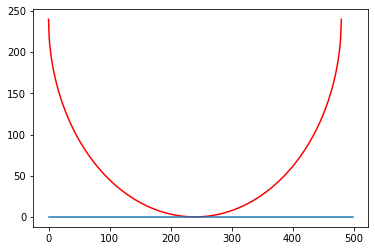

In [71]:
x = np.linspace(0, 480, 480)
y = -(240 ** 2 - ((x - 240) ** 2)) ** 0.5 + 240 #add 240 to keep function above the x-axis
plt.plot(x, y, 'r')
z = np.zeros(500)
plt.plot(z)
plt.show;

#The plot below is to demonstrate the calculation about to be made. If a sunspot travels along the blue line,
#it is actually traveling along the red line, since the sun is approximately a sphere. Thus, when calculating 
#velocity and period, this must be accounted for. Even though the sunspots seemingly only move from left to right
# in the picture, they actually move along the red line in 3d space.
#The methodology used for this involves calculating the arc length of the function representated by the red line (the
# actual sun) as a sunspot moves.

The formula for arc length is 
# $ \int_{x_1}^{x_2} \sqrt{1 + f'(x)^2} \,dx $

so we have to import a package that allows us to integrate and take derivatives.

In [74]:
import scipy.integrate as intgrl
import sympy as sym

In [132]:
#Define a function that takes two x-coordinates and two Times, and returns the velocity of the sunspot in km/sec.

def calculate_velocity(x1, x2, t1, t2):
    timeDiff = (t2 - t1).total_seconds()
    print('timeDiff = ' + str(timeDiff))
    
    print(km_per_coord(x1, x2))
    xDiff = (x2 - x1) * km_per_coord(x1, x2)
    print('xDiff = ' + str(xDiff))
    
    return xDiff / timeDiff

#Define a function that calculates the distance moved given two coordinates
def km_per_coord(x1, x2):
    func = lambda x: math.sqrt(1 + sym.diff(-(240 ** 2 - ((x - 240) ** 2)) ** 0.5 + 240) ** 2)
    arc_length, error = intgrl.quad(func, x1, x2) #this finds arc length using formula above
    sun_length = arc_length * 696000 #convert to kilometers on the sun using radius(sun) = 696,000 km
    return sun_length
    
#Define a function that takes x-velocity, the length of a spot's latitude, and a boolean on whether we are calculating
#period in terms of seconds or days. Returns the period of the sun's rotation from this data.

def period(vel, latLen, day):
    len_km = latLen * km_per_coord
    return ((math.pi() * len_km) / vel)
    

In [133]:
#Now the real work begins:

velo_spotA = []

for i in range(len(spotA_xcoords) - 1):
    velo_spotA.append(calculate_velocity(spotA_xcoords[i], spotA_xcoords[i + 1], times[i], times[i + 1]))

    
print(velo_spotA)

velo_spotB = []

for i in range(len(spotB_xcoords) - 1):
    velo_spotB.append(calculate_velocity(spotB_xcoords[i], spotB_xcoords[i + 1], times[i], times[i + 1]))
    
print(velo_spotB)

timeDiff = 83880.0
35496000.0
xDiff = 1810296000.0
timeDiff = 85320.0
36192000.0
xDiff = 1881984000.0
timeDiff = 86400.0
34800000.0
xDiff = 1740000000.0
[21581.97424892704, 22057.946554149086, 20138.88888888889]
timeDiff = 83880.0
31320000.0
xDiff = 1409400000.0
timeDiff = 85320.0
34104000.0
xDiff = 1671096000.0
timeDiff = 86400.0
36192000.0
xDiff = 1881984000.0
[16802.575107296136, 19586.21659634318, 21782.222222222223]


In [134]:
p = period(19586, spotB_L, False)

TypeError: unsupported operand type(s) for *: 'int' and 'function'